In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import platform
from matplotlib import font_manager, rc
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
df = pd.read_excel("C:/Users/USER/Desktop/kny/유사도 측정/뉴스내용vsSNS이미지내용간유사도측정/뉴스내용vsSNS게시물이미지_데이터임베딩완료_231115_김나영.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NO          1307 non-null   int64  
 1   플랫폼         1307 non-null   int64  
 2   파일명         1307 non-null   object 
 3   게시물이미지      1307 non-null   float64
 4   언론사명        1307 non-null   int64  
 5   뉴스주소        1307 non-null   object 
 6   뉴스제목        1307 non-null   float64
 7   뉴스내용        1307 non-null   float64
 8   유사도(코사인)    1307 non-null   float64
 9   유사도 구간      1307 non-null   float64
 10  Similarity  1307 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 112.4+ KB


In [5]:
new_df = df[['플랫폼', '게시물이미지', '언론사명', '뉴스제목', '뉴스내용', '유사도(코사인)', 'Similarity']]

In [6]:
new_df.head()

,플랫폼,게시물이미지,언론사명,뉴스제목,뉴스내용,유사도(코사인),Similarity
0,5,0.007837,45,-0.000550,-0.000032,0.067360,0
1,3,0.010703,59,-0.000797,0.016229,0.029872,0
2,1,0.005809,17,-0.000379,0.007205,0.006629,0
3,6,0.011834,10,-0.000326,0.002155,0.137650,0
4,2,0.001100,1,-0.000950,0.013533,0.244335,1


### 변수간 관계 알아보기

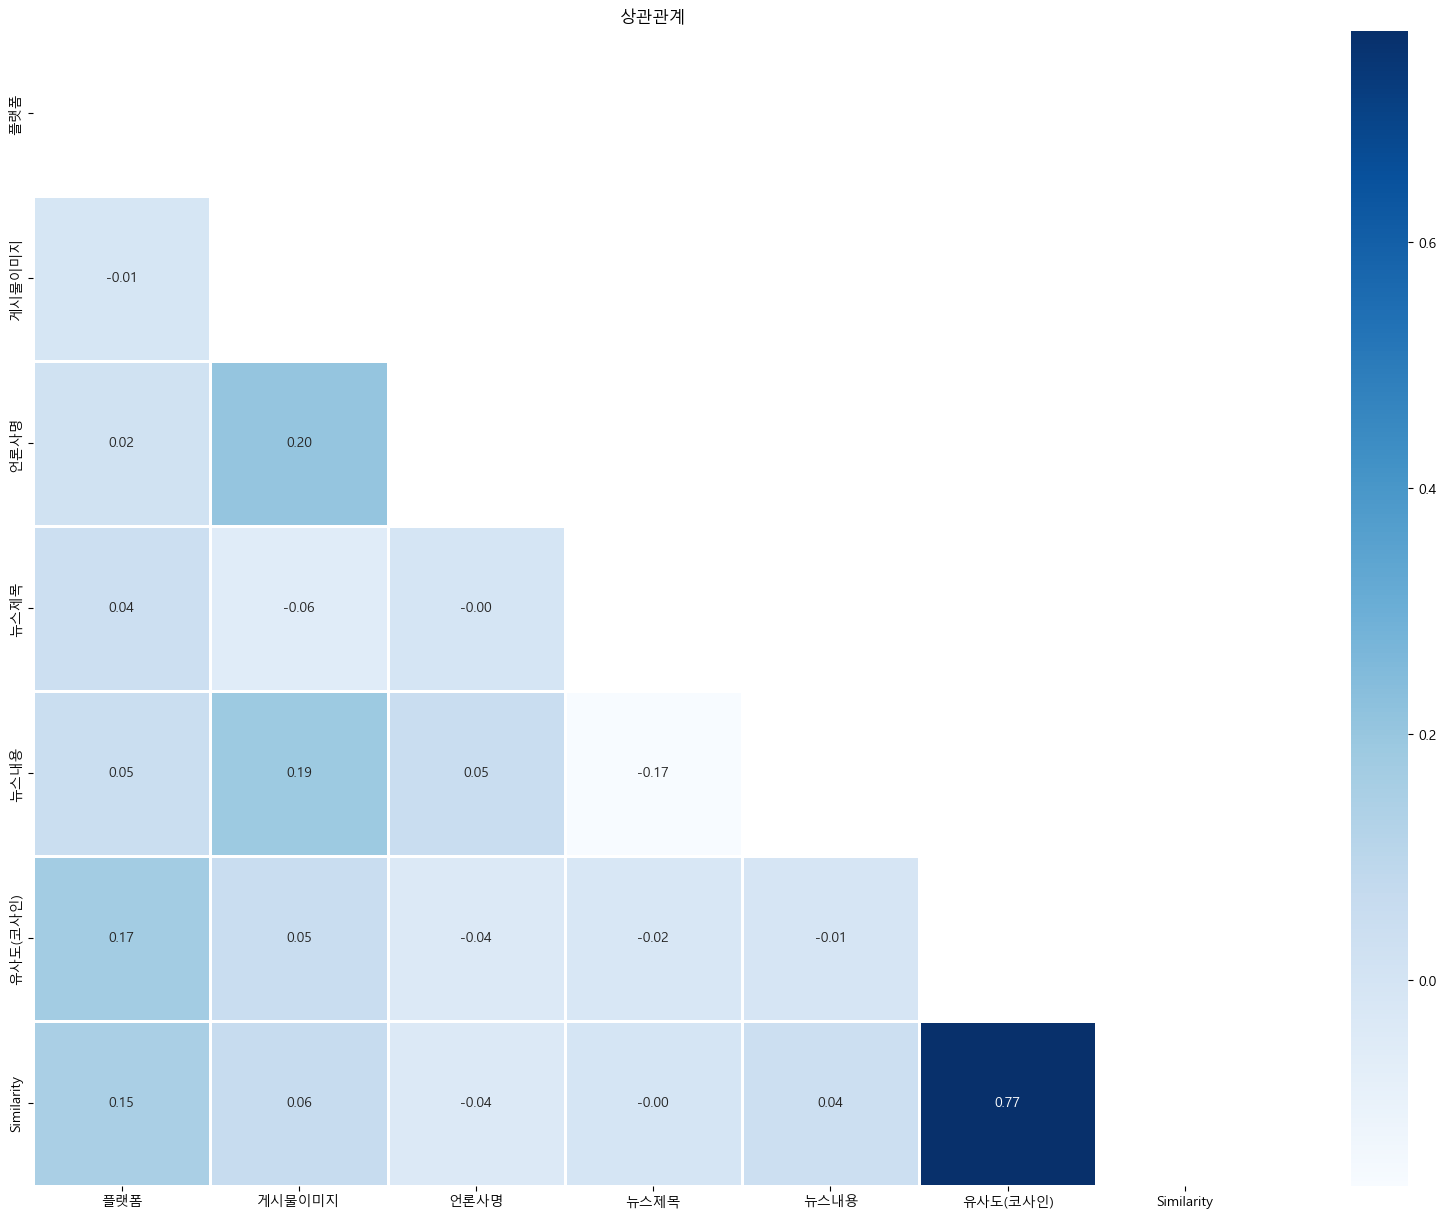

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

corr = new_df.corr()

plt.figure(figsize = (20,15))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data = corr, annot = True, mask=mask, fmt = '.2f', linewidths = 1., cmap = 'Blues')
plt.title('상관관계')
plt.show()

In [9]:
pd.DataFrame(corr, columns=['플랫폼', '게시물이미지', '언론사명', '뉴스제목', '뉴스내용', '유사도(코사인)', 'Similarity'])

,플랫폼,게시물이미지,언론사명,뉴스제목,뉴스내용,유사도(코사인),Similarity
플랫폼,1.000000,-0.010416,0.016772,0.041213,0.048455,0.170989,0.148687
게시물이미지,-0.010416,1.000000,0.204841,-0.060393,0.185583,0.054073,0.060529
언론사명,0.016772,0.204841,1.000000,-0.001916,0.054793,-0.036474,-0.037046
뉴스제목,0.041213,-0.060393,-0.001916,1.000000,-0.166755,-0.017589,-0.003971
뉴스내용,0.048455,0.185583,0.054793,-0.166755,1.000000,-0.007267,0.039155
유사도(코사인),0.170989,0.054073,-0.036474,-0.017589,-0.007267,1.000000,0.771557
Similarity,0.148687,0.060529,-0.037046,-0.003971,0.039155,0.771557,1.000000


### 주성분분석(PCA)

In [11]:
from sklearn.preprocessing import StandardScaler

features = ['플랫폼', '게시물이미지', '언론사명', '뉴스제목', '뉴스내용', '유사도(코사인)']

In [12]:
# 특징 분리
x = df.loc[:, features].values

In [13]:
# 타겟 분리
y = df.loc[:, ['Similarity']].values

In [14]:
x = StandardScaler().fit_transform(x)

In [15]:
pd.DataFrame(x, columns=features).head()

,플랫폼,게시물이미지,언론사명,뉴스제목,뉴스내용,유사도(코사인)
0,1.649220,0.447476,0.708425,-0.028926,-1.088056,0.122635
1,0.452036,1.146658,1.313625,-0.776717,1.162232,-0.371573
2,-0.745149,-0.047190,-0.501974,0.488041,-0.086489,-0.677980
3,2.247812,1.422505,-0.804573,0.648759,-0.785420,1.049254
4,-0.146557,-1.195630,-1.193630,-1.238378,0.789125,2.455659


In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,0.124106,1.159457
1,2.180364,-0.243544
2,-0.588885,-0.869187
3,0.126328,2.450204
4,-0.135673,1.604722


In [18]:
print(pca.explained_variance_ratio_)

[0.22630423 0.1955616 ]


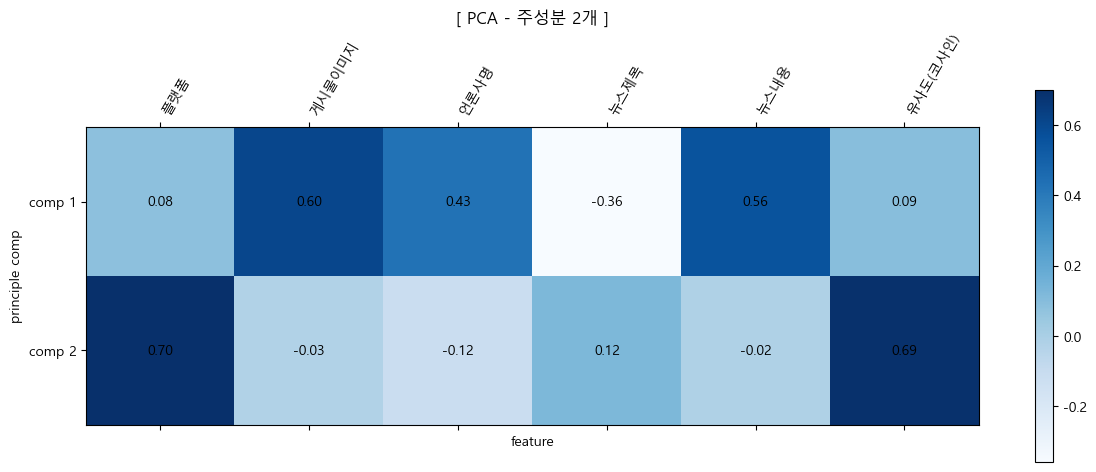

In [19]:
plt.matshow(pca.components_, cmap='Blues')
for (i, j), z in np.ndenumerate(pca.components_):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks([0, 1], ['comp 1', 'comp 2'])
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60, ha='left')

plt.xlabel('feature')
plt.ylabel('principle comp')
plt.title('[ PCA - 주성분 2개 ]')
plt.show()

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head()

,principal component 1,principal component 2,principal component 3
0,0.124106,1.159457,1.000974
1,2.180364,-0.243544,0.269981
2,-0.588885,-0.869187,0.035385
3,0.126328,2.450204,0.650871
4,-0.135673,1.604722,-2.337247


In [21]:
print(pca.explained_variance_ratio_)

[0.22630423 0.1955616  0.17754418]


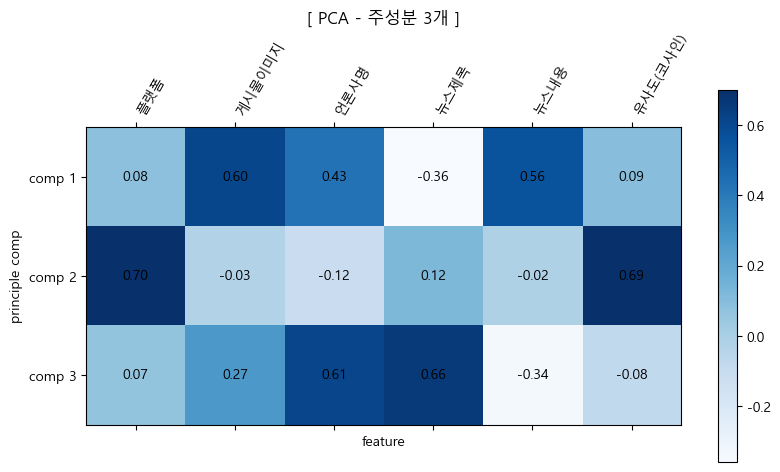

In [22]:
plt.matshow(pca.components_, cmap='Blues')
for (i, j), z in np.ndenumerate(pca.components_):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks([0, 1, 2], ['comp 1', 'comp 2', 'comp 3'])
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principle comp')
plt.title('[ PCA - 주성분 3개 ]')
plt.show()